In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers, utils, activations, losses, optimizers, metrics
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from glob import glob
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import pandas as pd

In [3]:
# Define Parameters
num_classes = 3
IMG_SIZE = 224

#### Data Visualization

In [4]:
paths = glob('D:/Record/AI_Technology/Computer-vision/Medical image analysis/Diabetic Retinopathy/retina-train/*.jpeg')
paths_test = sorted(glob('D:/Record/AI_Technology/Computer-vision/Medical image analysis/Diabetic Retinopathy/retina-test/*.jpeg'))
len(paths), len(paths_test)

(2086, 522)

D:/Record/AI_Technology/Computer-vision/Medical image analysis/Diabetic Retinopathy/retina-train\10069_left_0.jpeg


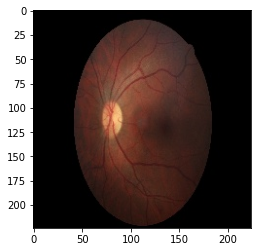

In [5]:
idx = 7
path = paths[idx]
img = cv2.imread(path)[:,:,::-1]
plt.imshow(img)
print(path)

In [6]:
all_filenames = [os.path.split(p)[1] for p in paths] # path -> ***.jpeg
print(all_filenames[:3])
all_cls = [int(name.split('.')[0].split('_')[-1]) for name in all_filenames] # ***.jpeg -> 0~4
print(all_cls[:3])

['10015_right_0.jpeg', '10017_right_2.jpeg', '10022_left_0.jpeg']
[0, 2, 0]


<BarContainer object of 3 artists>

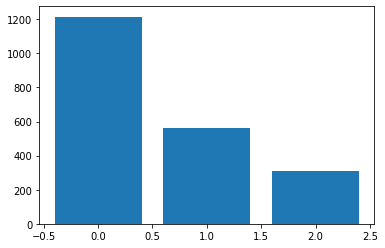

In [7]:
# Class distribution
cls, count = np.unique(all_cls, return_counts=True)
plt.bar(cls, count)

#### Prepare Data

In [8]:
# split dataset
path_train, path_val = train_test_split(paths, test_size=0.2)

len(path_train), len(path_val)

(1668, 418)

In [9]:
def create_dataset(paths, img_size=IMG_SIZE, num_classes=num_classes, test=False):
    num_data = len(paths)
    x_data = np.empty((num_data, img_size, img_size, 3))
    y_data = np.empty((num_data))

    for i, path in enumerate(tqdm(paths)):
        # read image and preprocess
        img = cv2.imread(path)[:,:,::-1]
        img = cv2.resize(img, (img_size, img_size))
        img = img / 255.
        x_data[i] = img

        if not test:
            # read class label
            filename = os.path.split(path)[1]
            cls = int(filename.split('.')[0].split('_')[-1]) # '38200_left_0.jpeg' -> 0
            y_data[i] = cls
    if not test:
        y_data = utils.to_categorical(y_data, num_classes=num_classes)
        return x_data, y_data
    else:
        return x_data

In [10]:
x_train, y_train = create_dataset(path_train)
x_val, y_val = create_dataset(path_val)
x_test = create_dataset(paths_test, test=True)

100%|████████████████████████████████████████████████████████████████████████████████| 522/522 [00:08<00:00, 62.79it/s]


In [11]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((1668, 224, 224, 3), (1668, 3), (418, 224, 224, 3), (418, 3))

#### Prepare model

In [12]:
# -------------------------------- Basic --------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------- DL --------------------------------
import tensorflow as tf
from tensorflow.keras import datasets, models, layers, utils, activations, losses, optimizers, metrics # DNN 系列
from tensorflow.keras.layers import Dense, LSTM,Bidirectional,SimpleRNN,GRU,Activation # RNN系列
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D # CNN系列
from tensorflow.keras.layers import Input,BatchNormalization,AveragePooling2D # ResNet系列
from tensorflow.keras.regularizers import l2 # ResNet系列
from tensorflow import keras # ResNet系列
from tensorflow.keras.models import Model # ResNet系列
from tensorflow.keras.callbacks import ModelCheckpoint

# -------------------------------- ML --------------------------------

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , ExtraTreesClassifier , GradientBoostingClassifier , AdaBoostClassifier #, BaggingClassifier
#from xgboost.sklearn import XGBClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.neural_network import MLPClassifier

# -------------------------------- Data processing --------------------------------

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import  Normalizer 
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# -------------------------------- Model trianning & evaluate --------------------------------

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [13]:
img_rows,img_cols = 224,224
RGB = 3
num_classes = 3

In [14]:
# # Build your own model
model =  models.Sequential()
model.add(Conv2D(filters=64, kernel_size=3, input_shape=(img_rows, img_cols, RGB), activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, input_shape=(img_rows, img_cols, RGB), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 128)       1

In [16]:
model.compile(optimizer='adam', 
              loss=losses.categorical_crossentropy, 
              metrics=[metrics.categorical_accuracy])

In [18]:
logs = model.fit(x_train, y_train,
                batch_size=32,
                epochs=50,
                validation_data=(x_val, y_val))

Train on 1668 samples, validate on 418 samples
Epoch 1/50
1668/1668 [==============================] - 502s 301ms/sample - loss: 0.9787 - categorical_accuracy: 0.5749 - val_loss: 0.9342 - val_categorical_accuracy: 0.5981
Epoch 2/50
1668/1668 [==============================] - 492s 295ms/sample - loss: 0.9728 - categorical_accuracy: 0.5785 - val_loss: 0.9386 - val_categorical_accuracy: 0.5981
Epoch 3/50
1668/1668 [==============================] - 503s 302ms/sample - loss: 0.9656 - categorical_accuracy: 0.5785 - val_loss: 0.9367 - val_categorical_accuracy: 0.5981
Epoch 4/50
1668/1668 [==============================] - 494s 296ms/sample - loss: 0.9689 - categorical_accuracy: 0.5785 - val_loss: 0.9395 - val_categorical_accuracy: 0.5981
Epoch 5/50
1668/1668 [==============================] - 498s 298ms/sample - loss: 0.9651 - categorical_accuracy: 0.5785 - val_loss: 0.9433 - val_categorical_accuracy: 0.5981
Epoch 6/50
1668/1668 [==============================] - 509s 305ms/sample - loss: 0

#### Make Submission file

In [17]:
predictions = np.argmax(model.predict(x_test), axis=-1)

df = pd.DataFrame()
df['Id'] = [p.split(os.sep)[-1] for p in paths_test]
df['Category'] = predictions
df.to_csv('submission.csv', index=None)
df

ERROR! Session/line number was not unique in database. History logging moved to new session 5079


,Id,Category
0,10017_left.jpeg,0
1,10031_right.jpeg,0
2,10150_left.jpeg,0
3,10154_right.jpeg,0
4,10440_right.jpeg,0
...,...,...
517,9608_left.jpeg,0
518,9673_right.jpeg,0
519,9690_left.jpeg,0
520,9717_right.jpeg,0


In [ ]:
# predict by your model
predictions = model.predict(x_Test)
if Mode <= 100 :
    predictions = np.argmax(predictions, axis=-1)

df = pd.DataFrame()
df['Id'] = [str(i) for i in range(len(x_Test))]
df['Category'] = predictions
df.to_csv(CSVpath, index=None)
df